In [1]:
import os
import logging 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.config.list_physical_devices('GPU')
import tensorflow.keras as keras
# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

In [2]:
df = pd.read_csv("MachineLearningCVE.csv")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.Label.value_counts()

BENIGN                      2273097
DoS Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack-Brute Force         1507
Web Attack-XSS                  652
Infiltration                     36
Web Attack-Sql Injection         21
Heartbleed                       11
Name: Label, dtype: int64

In [5]:
le = LabelEncoder()
# Fit the labels data to Label Encoder
df.Label = le.fit_transform(df.Label)
logging.info("Total rows: {}".format(df.Label.shape))
logging.info("Class distribution:\n{}\n".format(df.Label.value_counts()))

13:53:10 INFO Total rows: (2830743,)
13:53:10 INFO Class distribution:
0     2273097
4      231073
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: Label, dtype: int64



In [6]:
nan_rows = df[df.isna().any(axis=1)].shape[0]
logging.info("Fill NaN in {} rows with average value of each class.".format(nan_rows))
df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.mean()))
# Change inf value with maximum value of each class
inf_rows = df[df.isin([np.inf]).any(axis=1)].shape[0]
logging.info("Replace Inf in {} rows with maximum value of each class.".format(inf_rows))
# Temporary replace inf with NaN
df = df.replace([np.inf], np.nan)
# Replace inf with maximum value of each class in this dataset
df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.max()))
# Change negative value with minimum positive value of each class
logging.info("Replace negative values with minimum value of each class.")
# Temporary replace negative value with NaN
df[df < 0] = np.nan
# Replace negative value with minimum value of each class in this dataset
df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.min()))

13:53:10 INFO Fill NaN in 1358 rows with average value of each class.
13:53:52 INFO Replace Inf in 2867 rows with maximum value of each class.
13:54:28 INFO Replace negative values with minimum value of each class.


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

df = df.sample(frac=1)

In [8]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16652815633903925136
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2932309812
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7868255261915492869
 physical_device_desc: "device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [9]:
tf.test.is_built_with_cuda()

True

In [10]:
X = df.iloc[:, df.columns != 'Label']
y = df['Label']
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state= 42)

In [11]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[8.00000e+01 4.00000e+00 2.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.30000e+01 6.19530e+04 2.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.21100e+03 4.90000e+01 2.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [4.43000e+02 1.50341e+05 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.28000e+03 5.40000e+01 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.24610e+04 5.00000e+00 3.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
[[8.0000000e+01 8.1376030e+06 4.0000000e+00 ... 0.0000000e+00
  8.1367890e+06 8.1367890e+06]
 [4.4300000e+02 1.6979900e+05 1.3000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0000000e+01 3.7963000e+04 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.0000000e+01 9.8601863e+07 8.0000000e+00 ... 0.0000000e+00
  9.8500000e+07 9.8500000e+07]
 [6.0090000e+03 8.3000000e+01 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0000000e+01 2.7123317e+07 2.000000

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
print(X_train)
print(X_test)

[[1.22072175e-03 3.33333339e-08 4.55046005e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08728161e-04 5.16275009e-04 4.55046005e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.89967193e-02 4.08333340e-07 4.55046005e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.75974670e-03 1.25284169e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.05676356e-02 4.50000008e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.00503548e-01 4.16666674e-08 9.10092010e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[1.22074038e-03 6.78133600e-02 1.37743577e-05 ... 0.00000000e+00
  6.78065750e-02 6.78065750e-02]
 [6.75984985e-03 1.41499170e-03 5.50974306e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.22074038e-03 3.16358341e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.22074038e-03 8.21682212e-01 3.21401679e-05 ... 0.00000000e+00
  8.20833333e-01 8.20833333e-01]

In [15]:
def shaping(result: np.ndarray) -> np.ndarray:
    value = np.zeros((result.shape[0], 81))
    value[:, : -3] = result
    
    value = np.reshape(value, (value.shape[0], 9, 9))
    result = value[..., tf.newaxis]
    
    return result

In [16]:
X_train = shaping(X_train)
X_test = shaping(X_test)

In [17]:
X_train.shape

(1981520, 9, 9, 1)

In [18]:
X_test.shape

(849223, 9, 9, 1)

In [19]:
def plot_history(history: tf.keras.callbacks.History):
    # summarize history for accuracy
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('CNN-IDS model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('CNN-IDS model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [20]:
def create_cnn_model() -> keras.Model:
    # Creating layers
    inputs = keras.layers.Input(shape=(9, 9, 1))
    w = keras.layers.Conv2D(120, 2, activation='relu', padding="same")(inputs)
    w = keras.layers.Conv2D(60, 3, activation='relu', padding="same")(w)
    w = keras.layers.Conv2D(30, 4, activation='relu', padding="same")(w)
    w = keras.layers.Flatten()(w)
    outputs = keras.layers.Dense(15, activation='softmax')(w)
    cnn_model = keras.Model(inputs=inputs, outputs=outputs, name='cnn')

    # Compile layers
    cnn_model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'],
                      optimizer='adam')

    return cnn_model

In [21]:
# Create model
model = create_cnn_model()
logging.info(model.summary())

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 9, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 120)         600       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 60)          64860     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 30)          28830     
                                                                 
 flatten (Flatten)           (None, 2430)              0         
                                                                 
 dense (Dense)               (None, 15)                36465     
                                                                 
Total params: 130,755
Trainable params: 130,755
Non-trainable p

14:01:12 INFO None


In [22]:
# Training
logging.info("*** TRAINING START ***")
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=20, batch_size=1024)

14:01:30 INFO *** TRAINING START ***


Epoch 1/20
1936/1936 [==============================] - 207s 95ms/step - loss: 0.1224 - sparse_categorical_accuracy: 0.9577 - val_loss: 0.0736 - val_sparse_categorical_accuracy: 0.9630
Epoch 2/20
1936/1936 [==============================] - 183s 94ms/step - loss: 0.0468 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0362 - val_sparse_categorical_accuracy: 0.9875
Epoch 3/20
1936/1936 [==============================] - 183s 94ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.0270 - val_sparse_categorical_accuracy: 0.9904
Epoch 4/20
1936/1936 [==============================] - 183s 94ms/step - loss: 0.0240 - sparse_categorical_accuracy: 0.9919 - val_loss: 0.0224 - val_sparse_categorical_accuracy: 0.9922
Epoch 5/20
1936/1936 [==============================] - 183s 94ms/step - loss: 0.0140 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.0111 - val_sparse_categorical_accuracy: 0.9977
Epoch 6/20
1936/1936 [==============================] - 183s 94ms/step - lo

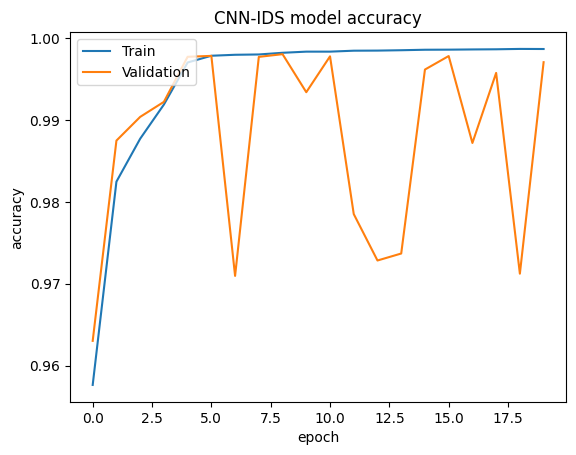

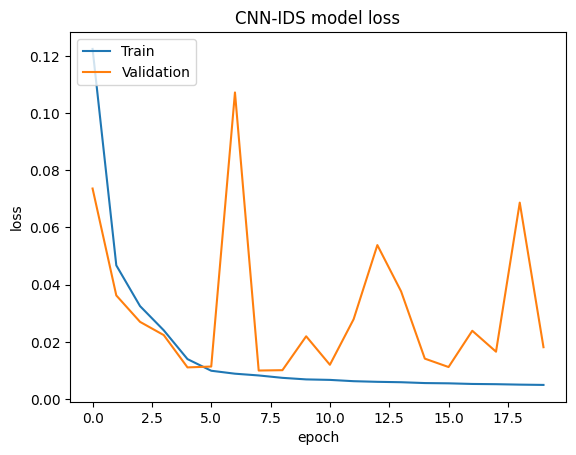

In [23]:
plot_history(history)

In [24]:
print(model.evaluate(X_test, y_test, batch_size = 1024))

830/830 [==============================] - 25s 30ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9970
[0.01814422756433487, 0.9970396757125854]


In [25]:
y_pred = model.predict(X_test, batch_size = 1024)
y_pred = np.argmax(y_pred, axis=1)

830/830 [==============================] - 23s 27ms/step


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    682569
           1       0.72      0.62      0.66       682
           2       1.00      1.00      1.00     38411
           3       1.00      0.98      0.99      3145
           4       1.00      1.00      1.00     69354
           5       0.99      0.98      0.98      1664
           6       0.99      0.99      0.99      1746
           7       1.00      1.00      1.00      2383
           8       1.00      1.00      1.00         3
           9       0.82      0.90      0.86        10
          10       0.97      0.99      0.98     46778
          11       0.99      0.98      0.99      1796
          12       0.98      0.69      0.81       645
          13       0.67      0.17      0.27        24
          14       0.05      0.69      0.09        13

    accuracy                           1.00    849223
   macro avg       0.88      0.87      0.84    849223
weighted avg       1.00   

In [27]:
print(y_pred[:100]) 

[ 2  0  0  0  0  4  3  0  0 10  0  0  0 10  0  0  0  0  0  0  0  0  0  2
  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0 10  0 10 10  0  0  0  0  0
  0  0  0  0 10  0  0  0  0  0  0  3  0  0  0 10  0  0  0  0  0  4  4  0
  0  0  2  0  0  0  2  0  0  0  0  4  8  0  0  4  0  6  0  0  0  0  0  4
  0  0  0 10]


In [28]:
print(le.inverse_transform(y_pred[:100]))

['DDoS' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'DoS Hulk' 'DoS GoldenEye'
 'BENIGN' 'BENIGN' 'PortScan' 'BENIGN' 'BENIGN' 'BENIGN' 'PortScan'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'DDoS' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'DoS Hulk' 'BENIGN' 'BENIGN'
 'BENIGN' 'PortScan' 'BENIGN' 'PortScan' 'PortScan' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'PortScan'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'DoS GoldenEye'
 'BENIGN' 'BENIGN' 'BENIGN' 'PortScan' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'DoS Hulk' 'DoS Hulk' 'BENIGN' 'BENIGN' 'BENIGN' 'DDoS' 'BENIGN'
 'BENIGN' 'BENIGN' 'DDoS' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'DoS Hulk'
 'Heartbleed' 'BENIGN' 'BENIGN' 'DoS Hulk' 'BENIGN' 'DoS slowloris'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'DoS Hulk' 'BENIGN' 'BENIGN'
 'BENIGN' 'PortScan']


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )
print(cm)

[[681102    260     20     60     33     31      3      4      0      1
     341     37     17     18      2]
 [   168    422      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [    17      0  38391      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     6      0      0   3081      0      1      0      0      0      0
       0      0      0      0      0]
 [     3      0      0      0  69319      0      0      0      0      0
       0      0      0      0      0]
 [     7      0      0      1      0   1627     14      0      0      0
       0      0      1      0      0]
 [     5      0      0      0      0      5   1728      0      0      0
       0      0      1      0      0]
 [     3      0      0      0      0      0      1   2377      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      3      0
       0      0      0      0      0]
 [     2  

Text(95.72222222222221, 0.5, 'Actual values')

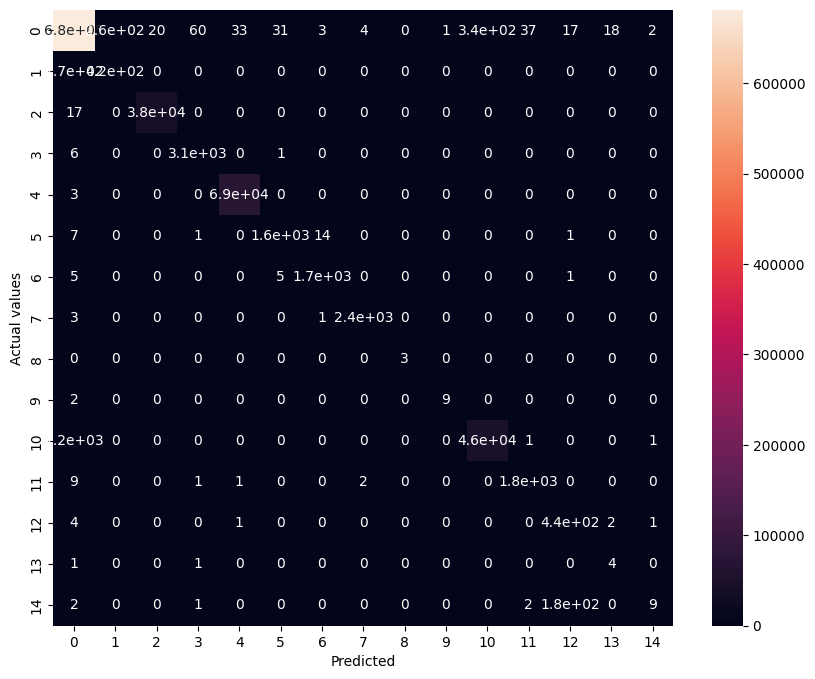

In [30]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual values')